In [1]:
from pynth import *

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

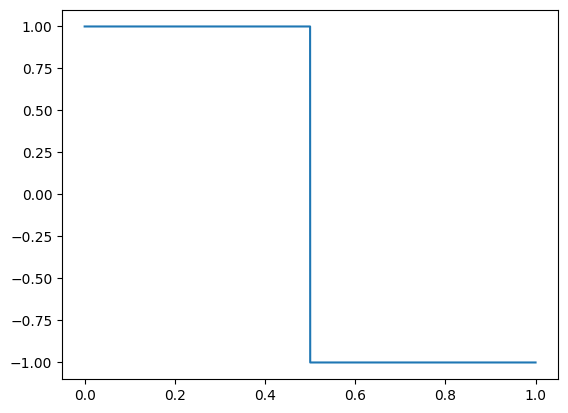

In [2]:
class Pulse(Oscillator):
    def __init__(self, duty=1/8):
        self.duty = duty

    def take(self, p):
        return 1 if p < self.duty else -1


Pulse(1/2).plot()

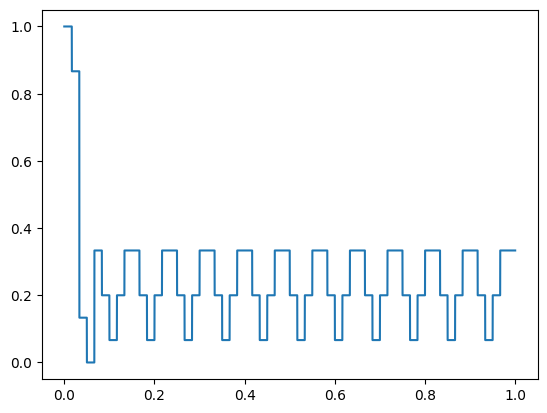

In [3]:
class Mml(Oscillator):
    def __init__(self, start, end=[], loop=[], proc=None):
        self.start = np.array(start)
        self.end = np.array(end)
        self.loop = np.array(loop if loop else [start[-1]])
        if proc:
            self.start = proc(self.start)
            self.end = proc(self.end)
            self.loop = proc(self.loop)

    def take(self, p, t, d):
        u =  60 / 900 / 4
        n = int((d - t) / u)
        if n < self.end.size:
            return self.end[n]

        n = int(t / u)
        if n < self.start.size:
            return self.start[n]

        n = (n - self.start.size) % self.loop.size
        return self.loop[n]


amp = Mml([0xF, 0xD, 0x2, 0x0], loop=[0x5, 0x3, 0x1, 0x3, 0x5], proc=lambda x: x / 0xF)
amp.plot()

In [4]:
s = Score(
    title="Dragon Quest II - Overture",
    composer="椙山浩一",
    tempo=276,
    parts=['pulse1', 'pulse2'],
)

amp = Mml([0xF, 0xE, 0xE, 0xE, 0xD, 0xC, 0xB, 0x2], proc=lambda x: x / 0xF)
tremolo = Mml([0xF, 0xE, 0xE, 0xE, 0xD, 0xC, 0xB], loop=[0xA, 0x9, 0x8, 0x9, 0xA, 0xB, 0xB], proc=lambda x: x / 0xF)
# tremolo.plot()

s['pulse1'] = [let(wav=Pulse(1/2), amp=amp)]
s['pulse2'] = [let(wav=Pulse(1/4), amp=amp)]

s['pulse1'] += [A(4)/2, A/4, G, G, G, F,    G,    A, +A, A, G, A, +A, C(5),  D,  F,  D,  C, +A(4), A]
s['pulse2'] += [F(4)/2, F/4, C, C, C, A(3), C(4), F,  G, F, C, F,  G, A,    +A,  D, +A,  A,  F,    C]

s['pulse1'] += [G(4)/2, G/4, A/4*1.5, A/4, A, F,    A,    G.that(amp=tremolo)/1*2]
s['pulse2'] += [C(4)/2, C/4, F/4*1.5, F/4, F, A(3), F(4), C.that(amp=tremolo)/1*2]

s.audio()